# AuE8930 Perception and Intelligence 
## Final project
### Testing of pretrained YOLO object detection model

In [12]:
import os
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
from   model.yolo_model import YOLO

In [5]:
def process_image(img):
    #Resize, reduce and expand image.
    image  = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image  = np.array(image, dtype='float32')
    image /= 255.
    image  = np.expand_dims(image, axis=0)
    return image

In [6]:
def get_classes(file):
    #Get classes name. Arg - class name for database, Return - Class name
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

In [7]:
def draw(image, boxes, scores, classes, all_classes):
    #"""Draw the boxes on the image.
    # Argument:
    #    image: original image.
    #    boxes: ndarray, boxes of objects.
    #    classes: ndarray, classes of objects.
    #    scores: ndarray, scores of objects.
    #    all_classes: all classes name.
    #"""
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box
        top    = max(0, np.floor(x + 0.5).astype(int))
        left   = max(0, np.floor(y + 0.5).astype(int))
        right  = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))
    print()

In [8]:
def detect_image(image, yolo, all_classes):
    #"""Use yolo v3 to detect images.
    # Argument:
    #    image: original image.
    #    yolo: YOLO, yolo model.
    #    all_classes: all classes name.

    # Returns:
    #    image: processed image.
    #"""
    pimage = process_image(image)

    start  = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end    = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [9]:
def detect_video(video, yolo, all_classes):
    #"""Use yolo v3 to detect video.
    # Argument:
    #    video: video file.
    #    yolo: YOLO, yolo model.
    #    all_classes: all classes name.
    #"""
    
    video_path = os.path.join("videos", "test", video)
    camera     = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz     = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)
    n = 0
    while True:
        res, frame = camera.read()

        if not res:
            break
        n = n+1
        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)
        print(format(n),'th frame processed')

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()

In [10]:
# load yolo model and weights 
yolo = YOLO(0.6, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

/home/vipulk/.conda/envs/tf_env/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [13]:
# detect image
f     = 'test2.jpg'                              #  
path  = 'image_test/test/'+ f                    # image_path
image = cv2.imread(path)                         # read image
image = detect_image(image, yolo, all_classes)   # detect '{process  - yolo_detect - draw box - return image}'
cv2.imwrite('image_test/result/' + f , image)

time: 5.31s
class: person, score: 0.95
box coordinate x,y,w,h: [793.99808347 259.20847058 217.92099217 619.27217245]
class: car, score: 0.99
box coordinate x,y,w,h: [434.99388456 258.25953484 444.07985145 192.93877482]
class: car, score: 0.99
box coordinate x,y,w,h: [151.51284277 341.13326669 972.43716753 612.96564341]



True

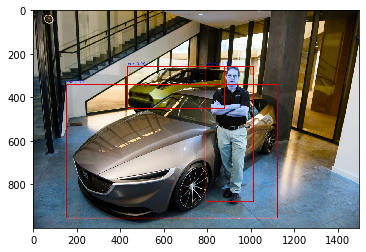

In [16]:
# Show result image
f_result = 'image_test/result/' + f
img      = cv2.imread(f_result)
img2     = img[:,:,::-1]
plt.imshow(img)

In [ ]:
# detect onbjects in video # takes a lot of time if not run with GPU
v     = 'test_vid1.mp4'
path  = 'image_test/test/'+ v                    # image_path
video = 'library1.mp4'
detect_video(video, yolo, all_classes)

In [ ]:
# py script and video
#if __name__ == '__main__':
#    yolo = YOLO(0.6, 0.5)
#    file = 'data/coco_classes.txt'
#    all_classes = get_classes(file)
    
#    video = 'library1.mp4'
#    detect_video(video, yolo, all_classes)
    